In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import json
import random

In [2]:
# Initialize COCO api for instance annotations
gt_coco = COCO('/workspace/chanyoung/data/cropped/multi_channel/coco_multi_det_channel_val.json')
# with open("/workspace/chanyoung/code/MODU/output/lulu/mutil_channel/tiny_multi_250407/pred.json", 'r') as f:
#     pred1 = json.load(f)
with open("/workspace/chanyoung/code/MODU/output/lulu/mutil_channel/tiny_multi_precoco_250407/pred.json", 'r') as f:
    pred2 = json.load(f)
with open("/workspace/chanyoung/code/MODU/output/lulu/mutil_channel/tiny_multi_4f_250407/pred.json", 'r') as f:
    pred3 = json.load(f)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [3]:
pred2.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149'])

In [4]:
pred3.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149'])

In [5]:
def get_pred_anns(pred, img_id, score_threshold=0.5):
    anns = []
    
    labels = pred[str(img_id)]['labels']
    bboxs = pred[str(img_id)]['boxes']
    scores = pred[str(img_id)]['scores']
    # print(labels)
    # print(bboxs)
    # print(scores)
    for label, t_bbox, score in zip(labels, bboxs, scores):
        if float(score) < score_threshold:
            continue
        t_bbox[2] -= t_bbox[0]
        t_bbox[3] -= t_bbox[1]
        anns.append({'category_id': int(label), 'bbox': t_bbox, 'score': float(score)})
    
    return anns

In [6]:
colormap = {}
for i in range(1, 12):
    hex_color_code = '#' + ''.join(random.choice('0123456789abcdef') for _ in range(6))
    colormap[i] = hex_color_code
colormap

{1: '#80ffb7',
 2: '#556493',
 3: '#cec987',
 4: '#dce4f5',
 5: '#358769',
 6: '#c54131',
 7: '#8cc2a6',
 8: '#a41a30',
 9: '#447f52',
 10: '#979d6a',
 11: '#d969fd'}

In [7]:
colormap = {1: '#00FF00', 2:'#FF0000'}

In [8]:
i = 0

134


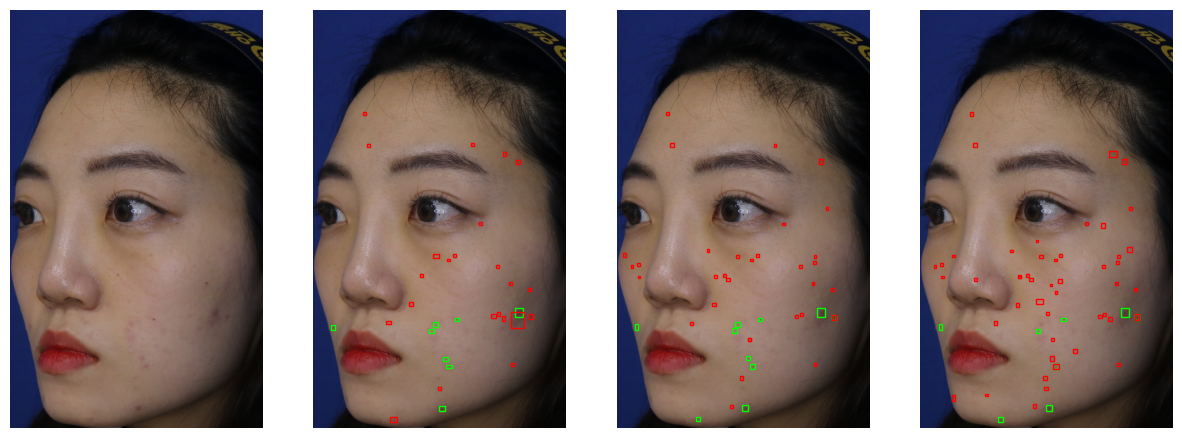

In [81]:
# Load and display a random image
imgIds = gt_coco.getImgIds()
img = gt_coco.loadImgs(imgIds[i])[0]

# Load and display image from local path
image_path = os.path.join('/workspace/chanyoung/data/cropped/multi_channel/images', img['file_name'])
image = plt.imread(image_path)

# Load and display instance annotations
gt_anns = gt_coco.loadAnns(gt_coco.getAnnIds(imgIds=img['id'], iscrowd=None))
print(img['id'])

# Show annotations
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(15, 10))

ax0.imshow(image)

ax1.imshow(image)
for ann in gt_anns:
    t_bbox = ann['bbox']
    category_id = ann['category_id']
    edgecolor = colormap.get(category_id, 'r')
    # print(ann['category_id'], end=',')
    rect = patches.Rectangle((t_bbox[0], t_bbox[1]), t_bbox[2], t_bbox[3], linewidth=1, edgecolor=edgecolor, facecolor='none')
    ax1.add_patch(rect)

pred_anns = get_pred_anns(pred2, img['id'], 0.5)
ax2.imshow(image)
for ann in pred_anns:
    t_bbox = ann['bbox']
    category_id = ann['category_id']
    edgecolor = colormap.get(category_id, 'r')  # default to red if category_id not in color_map
    rect = patches.Rectangle((t_bbox[0], t_bbox[1]), t_bbox[2], t_bbox[3], linewidth=1, edgecolor=edgecolor, facecolor='none')
    ax2.add_patch(rect)

pred_anns = get_pred_anns(pred3, img['id'], 0.5)
ax3.imshow(image)
for ann in pred_anns:
    t_bbox = ann['bbox']
    category_id = ann['category_id']
    edgecolor = colormap.get(category_id, 'r')  # default to red if category_id not in color_map
    rect = patches.Rectangle((t_bbox[0], t_bbox[1]), t_bbox[2], t_bbox[3], linewidth=1, edgecolor=edgecolor, facecolor='none')
    ax3.add_patch(rect)

ax0.axis('off')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.show()

i+=1
